### Download dos dados

In [3]:
'''import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data'''

INFO: Downloading ['all'] to /tmp\sound_datasets\urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
5.61GB [4:05:58, 408kB/s]                                                                                              
100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [11:55<00:00, 12.21it/s]
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


Clip(
  audio_path="/tmp\sound_datasets\urbansound8k\audio/fold3/54067-2-0-48.wav",
  clip_id="54067-2-0-48",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_time: Th

### Informação do dataset

In [1]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("C:/tmp/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv")

In [40]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [4]:
import os
import librosa
import librosa.display
import glob 
import skimage

C:\Users\maria\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fsID,8732.0,116033.493816,57991.017218,344.000000,69942.250000,118279.000000,166942.000000,209992.000000
start,8732.0,38.645409,74.292126,0.000000,3.000000,10.376492,35.131372,600.125356
end,8732.0,42.253312,74.369669,0.105962,6.839398,14.000000,38.866979,604.125356
salience,8732.0,1.347000,0.476043,1.000000,1.000000,1.000000,2.000000,2.000000
fold,8732.0,5.385937,2.846820,1.000000,3.000000,5.000000,8.000000,10.000000
classID,8732.0,4.592877,2.894544,0.000000,2.000000,4.000000,7.000000,9.000000


In [7]:
df.isnull().sum() #nao existem valores null no df

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [8]:
#classes nao balanceadas
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

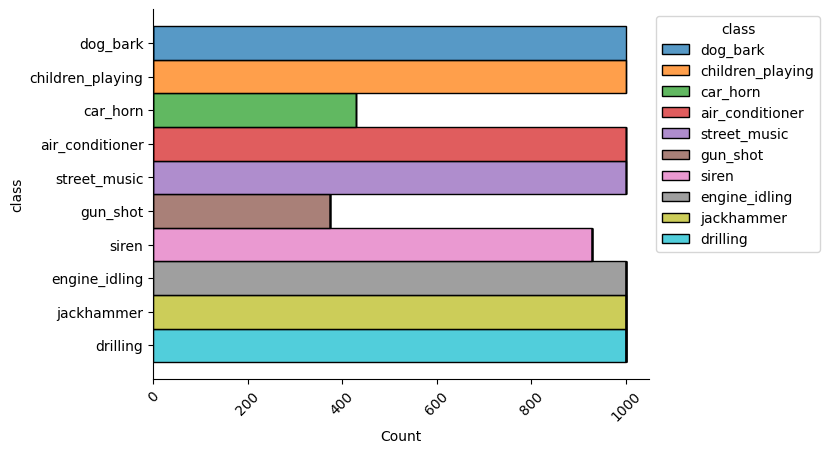

In [9]:
#ver graficamente
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
ax = sns.histplot(y='class',data = df, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45);
sns.despine()
plt.show()

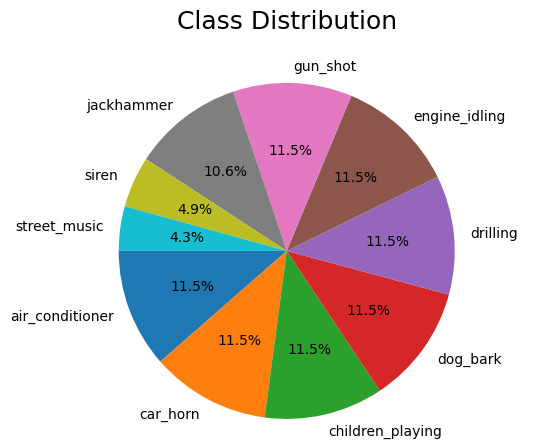

In [10]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.savefig("distribution_class")
plt.show(block=False)

#### Analizar amostras random dos sons

In [11]:
#sr = sampling rate -> numero de amostras do som por segundo
audiodata, sr=librosa.load('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')
audiodata

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0969747e-05,
       2.2333768e-05, 0.0000000e+00], dtype=float32)

In [12]:
sr

22050

In [13]:
import IPython.display as ipd
ipd.Audio('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')

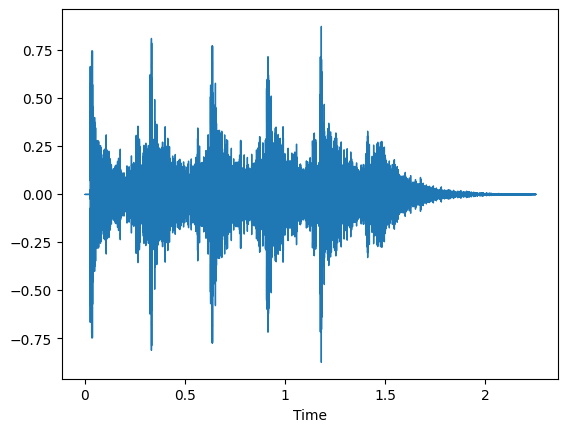

In [14]:
librosa.display.waveshow(audiodata, sr=sr)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

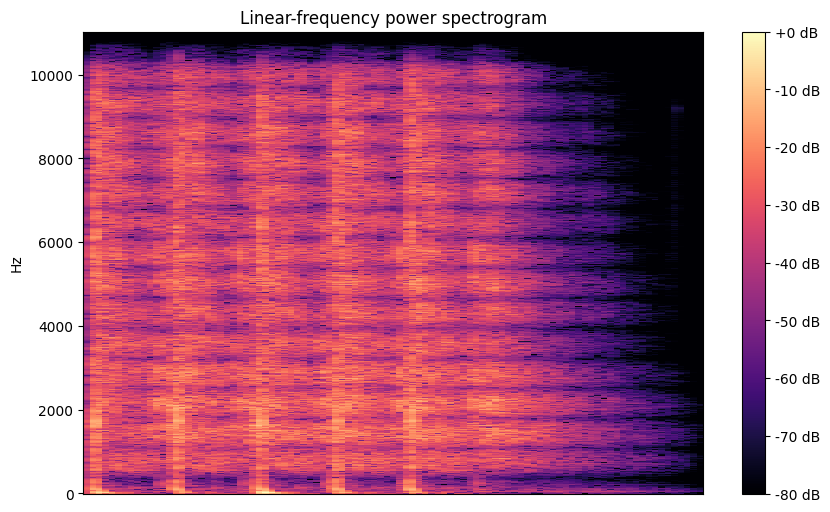

In [15]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [16]:
audio_file_path ='C:/tmp/sound_datasets/urbansound8k/audio/fold2/4201-3-0-0.wav'

audiodata2,sr2=librosa.load(audio_file_path)

ipd.Audio(audio_file_path)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

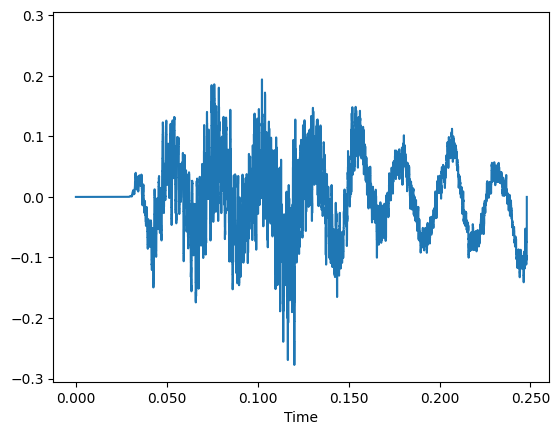

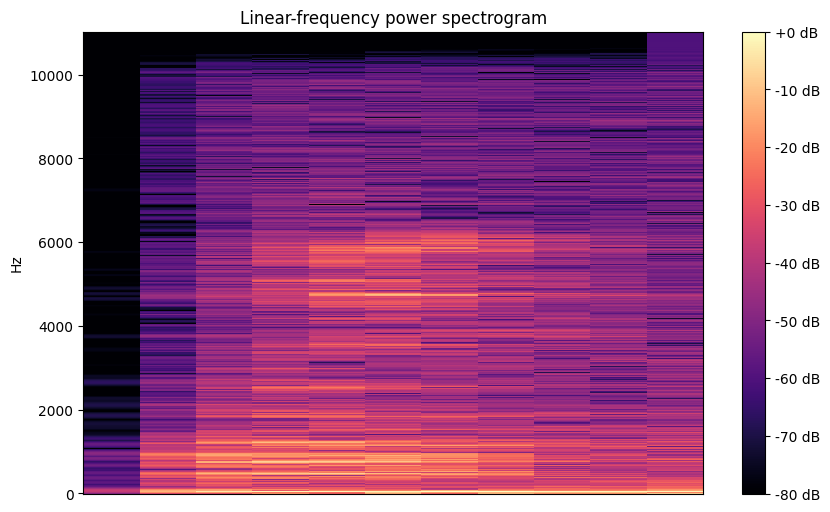

In [17]:
librosa.display.waveshow(audiodata2, sr=sr2)

D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata2)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

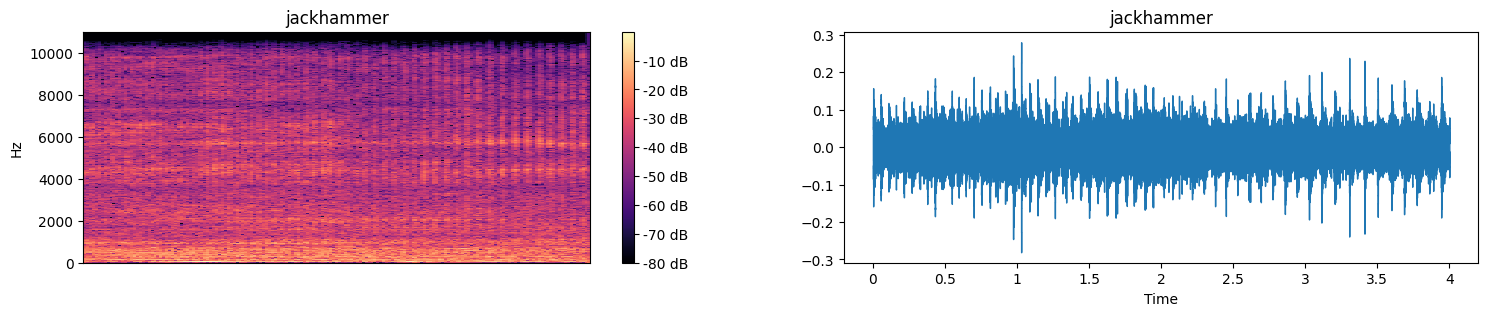

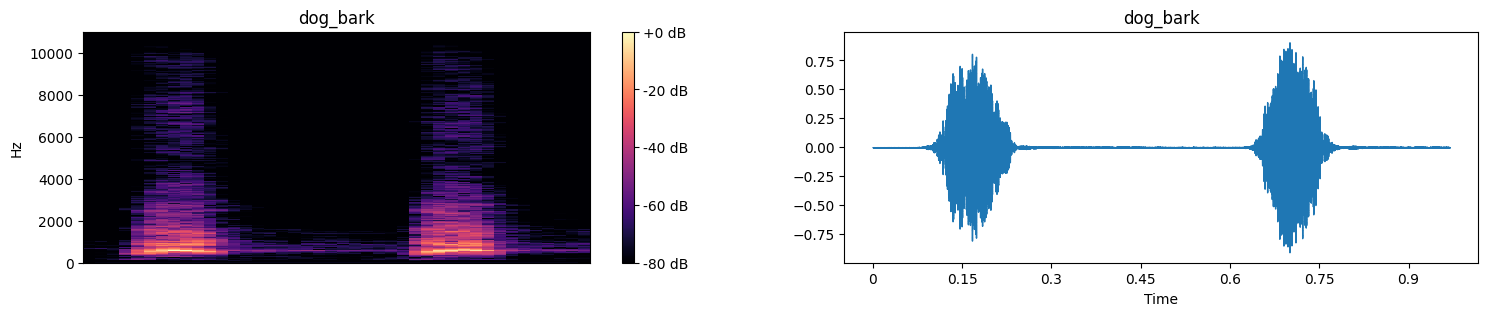

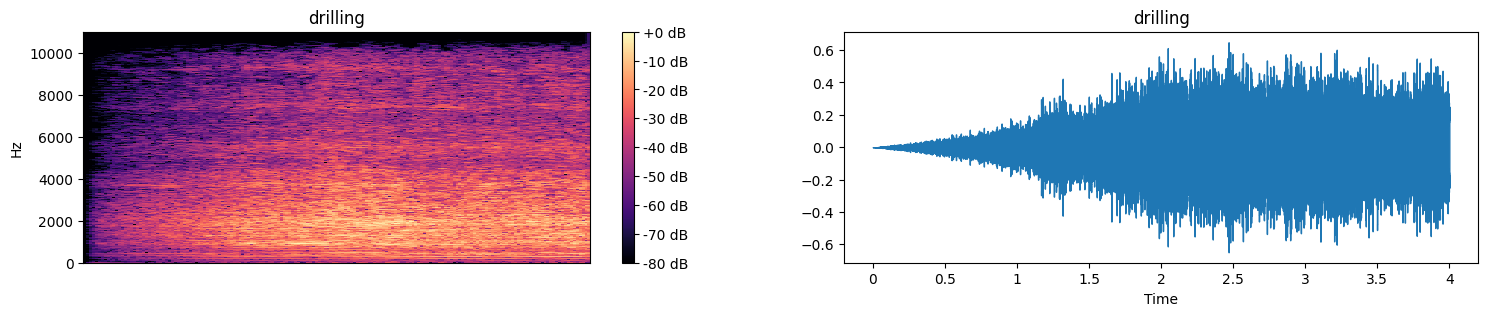

In [18]:
for i in range(192, 197, 2):
    audio_file_path = 'C:/tmp/sound_datasets/urbansound8k/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    
    audiodata3, sr3 = librosa.load(audio_file_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata3)), ref=np.max)
    
    plt.figure(figsize=(18, 3))
    
    plt.subplot(1, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(df["class"][i])
    
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(audiodata3, sr=sr3)
    plt.title(df["class"][i])

### Extrair features

In [ ]:
'''def extracao_features(audio_file):
    data,sr = librosa.load(audio_file, res_type='kaiser_fast')
    mfccs_file = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    return mfccs_file

from tqdm import tqdm

dir = "C:/tmp/sound_datasets/urbansound8k/audio/"

mfccs_audio_data = []
for index,row in tqdm(df.iterrows()):
    audio_path = dir + 'fold' + str(row['fold']) + '/' + row['slice_file_name']
    class_label = row['class']
    mfccs_audio = extracao_features(audio_path)
    mfccs_audio = np.mean(mfccs_audio.T,axis=0)
    mfccs_audio_data.append([mfccs_audio, class_label])

df_features =pd.DataFrame(mfccs_audio_data,columns=['features','class'])
df_features.to_csv('./featuredf.csv')'''

In [30]:
df_features = pd.read_csv('./featuredf.csv')
df_features

,Unnamed: 0,features,class
0,0,[-217.35526 70.22338 -130.38527 -5...,dog_bark
1,1,[-4.2409818e+02 1.0934077e+02 -5.2919525e+01 ...,children_playing
2,2,[-4.5879114e+02 1.2138419e+02 -4.6520660e+01 ...,children_playing
3,3,[-413.89984 101.66373 -35.42945 5...,children_playing
4,4,[-4.4660352e+02 1.1368541e+02 -5.2402206e+01 ...,children_playing
...,...,...,...
8727,8727,[-3.9858450e+02 1.3553496e+02 -5.0725018e+01 ...,car_horn
8728,8728,[-3.4647421e+02 8.6348152e+01 -4.5168579e+01 ...,car_horn
8729,8729,[-3.0388824e+02 1.1135945e+02 -4.5941563e+01 ...,car_horn
8730,8730,[-3.4411008e+02 1.2545021e+02 -5.4903442e+01 ...,car_horn


In [31]:
df_features['features'] = df_features['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

In [32]:
X = np.array(df_features['features'].tolist())
y = np.array(df_features['class'].tolist())

In [33]:
print(X.shape, y.shape)

(8732, 40) (8732,)


In [34]:
feature = pd.DataFrame(X)
target = pd.DataFrame(y, columns = ['class'])

In [41]:
df2 = pd.concat([feature, target], axis = 1)
df2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,class
0,-217.35526,70.223380,-130.385270,-53.282898,-21.199130,-22.677622,-10.855970,18.294254,6.652703,14.324025,...,6.970494,-0.248668,1.678219,-5.611182,-2.964347,3.149057,-1.693053,-0.616984,0.386005,dog_bark
1,-424.09818,109.340770,-52.919525,60.864750,0.245292,17.347328,2.095582,10.712965,-1.398613,12.310798,...,1.868079,-0.960069,0.036977,-0.015435,-0.071756,-1.598885,0.534893,-0.544687,0.446321,children_playing
2,-458.79114,121.384190,-46.520660,52.008121,-0.000384,23.783813,8.749806,9.052491,-0.636421,10.987134,...,-1.243447,-4.046100,-2.161726,-1.494173,-1.784590,-1.424619,2.076848,1.696297,-0.961409,children_playing
3,-413.89984,101.663730,-35.429450,53.036354,1.520218,14.886695,2.878706,7.631294,-2.215483,9.920996,...,1.192205,0.896591,0.998597,-2.278609,1.134797,-1.398987,-1.308791,-2.098211,-1.193339,children_playing
4,-446.60352,113.685410,-52.402206,60.302044,2.779428,25.073841,2.803380,10.143700,3.034920,10.420083,...,-1.249170,-0.344982,1.779847,-2.061510,0.043404,-0.698911,2.079336,1.116136,0.043719,children_playing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-398.58450,135.534960,-50.725018,35.855907,-8.039597,15.109999,7.619319,16.819832,-5.080297,3.601191,...,2.560357,4.204066,2.918537,-0.076288,1.535927,-4.409472,-7.080214,-2.464465,4.035294,car_horn
8728,-346.47421,86.348152,-45.168579,51.709873,-32.506092,-4.313032,18.822187,-0.500065,-14.026640,20.996353,...,2.989778,0.199695,6.329091,4.560744,0.637593,-1.592893,2.627199,-2.163822,-2.886271,car_horn
8729,-303.88824,111.359450,-45.941563,35.877018,-9.130412,12.614908,2.730064,9.983287,-7.045451,5.537090,...,0.037069,4.099027,6.523638,3.317523,1.906624,-3.719005,-3.029238,2.717030,7.619742,car_horn
8730,-344.11008,125.450210,-54.903442,34.891148,-19.626827,7.352660,13.471235,9.143031,-8.673483,18.334299,...,2.401435,5.968165,5.917666,1.596666,2.846005,-4.340133,-7.908244,-1.641459,5.666844,car_horn


In [42]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X = df2.drop('class', axis=1)  
y = df2['class'] 

#normalizacao-minmax scaling)
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)

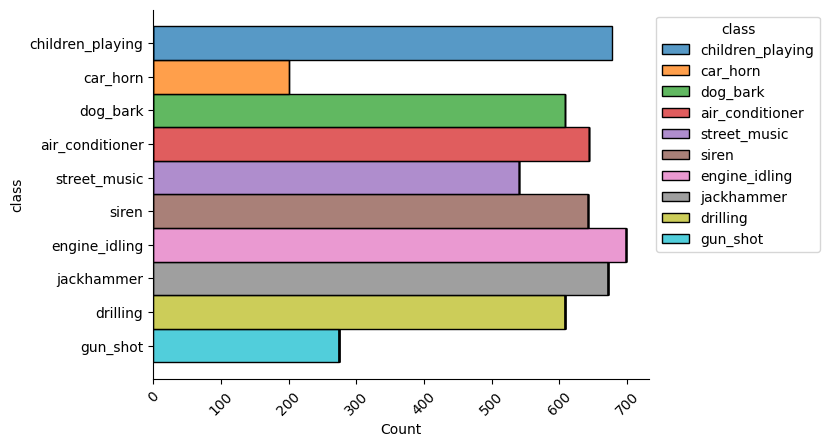

In [43]:
#trato do desbalanceamento
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

df_train = pd.DataFrame(data=X_train, columns=df2.columns[:-1])  # Substitua df.columns pelos nomes das colunas relevantes

# Adicione a coluna 'class' ao DataFrame de treino
df_train['class'] = y_train

# Crie o gráfico com os dados de treino
ax = sns.histplot(y='class', data=df_train, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [44]:
#Calcula a distribuição das classes
class_dict = y_train.value_counts(normalize=True)
print(class_dict)

children_playing    0.116965
engine_idling       0.115533
dog_bark            0.114388
air_conditioner     0.114102
drilling            0.113672
jackhammer          0.113386
street_music        0.110236
siren               0.109377
car_horn            0.049105
gun_shot            0.043236
Name: class, dtype: float64


In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter


# Combine oversampling e undersampling
over_sampling = SMOTE(sampling_strategy='auto', random_state=42)
under_sampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Crie um pipeline para aplicar as transformações
pipeline = Pipeline([
    ('over_sampling', over_sampling),
    ('under_sampling', under_sampling)
])

# Aplica as transformações aos dados
X_balanced, y_balanced = pipeline.fit_resample(X_train, y_train)

# Verifica a distribuição das classes após o balanceamento
print(Counter(y_balanced))

Counter({'air_conditioner': 817, 'car_horn': 817, 'children_playing': 817, 'dog_bark': 817, 'drilling': 817, 'engine_idling': 817, 'gun_shot': 817, 'jackhammer': 817, 'siren': 817, 'street_music': 817})
